In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
#%matplotlib inline     
sns.set(color_codes=True)
df = pd.read_csv("C:/Users/ADMIN/ds-homework/mtcars.csv")
df.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
df.tail(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [3]:
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [4]:
df = df.drop(['hp', 'drat', 'wt', 'qsec', 'vs', 'am'], axis=1)
df.head(5)

,model,mpg,cyl,disp,gear,carb
0,Mazda RX4,21.0,6,160.0,4,4
1,Mazda RX4 Wag,21.0,6,160.0,4,4
2,Datsun 710,22.8,4,108.0,4,1
3,Hornet 4 Drive,21.4,6,258.0,3,1
4,Hornet Sportabout,18.7,8,360.0,3,2


In [5]:
df = df.rename(columns={"model": "car_model", "mpg": "Miles Per Gallon", "hp": "Horsepower"})
df.head(5)

,car_model,Miles Per Gallon,cyl,disp,gear,carb
0,Mazda RX4,21.0,6,160.0,4,4
1,Mazda RX4 Wag,21.0,6,160.0,4,4
2,Datsun 710,22.8,4,108.0,4,1
3,Hornet 4 Drive,21.4,6,258.0,3,1
4,Hornet Sportabout,18.7,8,360.0,3,2


In [6]:
df.shape

(32, 6)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


In [8]:
df.count()

car_model           32
Miles Per Gallon    32
cyl                 32
disp                32
gear                32
carb                32
dtype: int64

In [9]:
df = df.drop_duplicates()
df.head(5)

,car_model,Miles Per Gallon,cyl,disp,gear,carb
0,Mazda RX4,21.0,6,160.0,4,4
1,Mazda RX4 Wag,21.0,6,160.0,4,4
2,Datsun 710,22.8,4,108.0,4,1
3,Hornet 4 Drive,21.4,6,258.0,3,1
4,Hornet Sportabout,18.7,8,360.0,3,2


In [10]:
df.count()

car_model           32
Miles Per Gallon    32
cyl                 32
disp                32
gear                32
carb                32
dtype: int64

In [11]:
print(df.isnull().sum())

car_model           0
Miles Per Gallon    0
cyl                 0
disp                0
gear                0
carb                0
dtype: int64


In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6452\4249959737.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)


Miles Per Gallon      7.375
cyl                   4.000
disp                205.175
gear                  1.000
carb                  2.000
dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6452\4249959737.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [16]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6452\4147643536.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(30, 6)

Text(0.5, 0, 'Make')

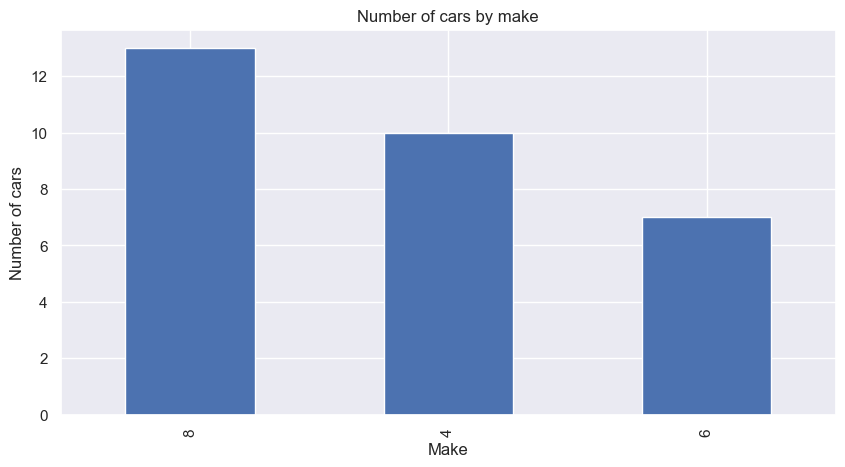

In [18]:
df.cyl.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6452\1305569818.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


<Axes: >

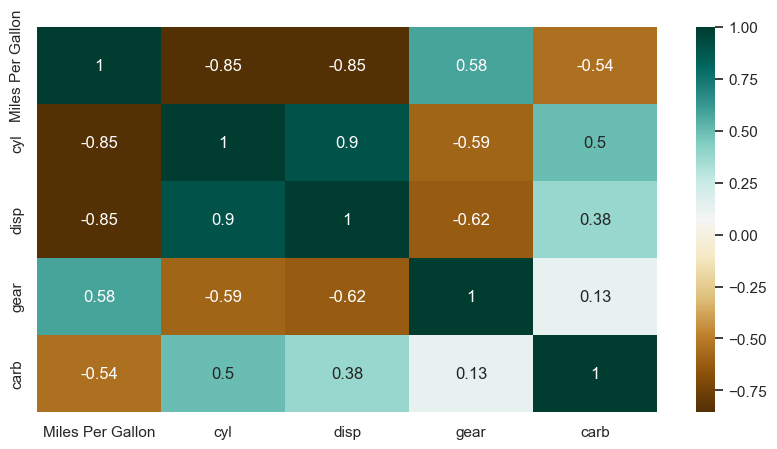

In [19]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

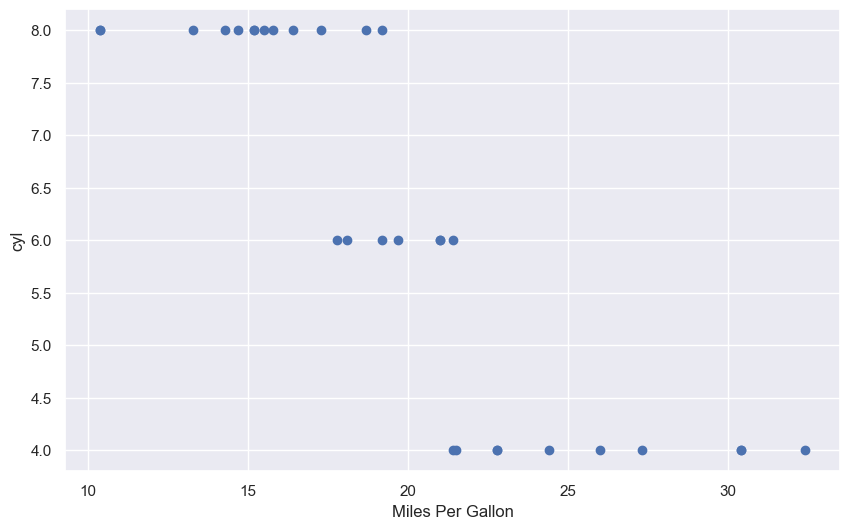

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Miles Per Gallon'], df['cyl'])
ax.set_xlabel('Miles Per Gallon')
ax.set_ylabel('cyl')
plt.show()